# <center>The Price of Gold<center>

## 1 Domain-specific area and objectives of the project 

The chosen domain for this report is financial markets, in particular, tracking one of the most popular commodity and a form of currency, **gold**.

Gold has been used as a form of currency and a store of value for centuries[1]. Its historical significance as a medium of exchange as well as symbol of wealth has contributed to its enduring role in finance. Gold is actively traded on daily basis on various global exchanges. Traders buy and sell gold futures contracts to speculate on its future price movements.

Gold is incorporated into various financial instruments, such as Exchange-Traded Funds (ETFs) and gold-backed securities[2]. These instruments allow commercial and retail investors to gain exposure to gold prices without physically owning the metal. It also helps to fight against inflation, as gold supply cannot be artificially inflated like fiat currencies[3].

As well as being a financial instrument to invest in and generate wealth, gold is often considered a "safe haven" asset. During times of economic uncertainty or political instability, people tend to flee towards gold as a store of value. Why? Gold is perceived as a stable and reliable asset that can retain its worth in challenging economic conditions. It can be said that people's perception and ideologies towards gold contributes to the metal's value as well.

**As of now, with global market instability, war, inflation and climate change determining where the price of gold will be in the near future can be a problem for both retail investor and institutions alike.**

Now that we know what gold is and why people value it, we can understand why Machine Learning (ML) can come into place here.

**A linear regression model can help us predict the future price of gold**. It can give investors an indicator of whether their asset will appreciate or depreciate in the coming future. It can also provide a general consensus of the public's view on gold, as declining gold prices could indicate a disinterest in gold as a commodity, as its demand may be dropping. *Though there are several factors the affect the price of gold*, using historical gold price data is a valid method of predicting its future price. There are already algorithms and trading bots being used by traders that utilize ML to make trades based of historical data.

The objective of this project is to build a model that will give us a prediction to future gold prices, which can be use to aid in our decision-making process of whether to add gold to our investment portfolio, or to liquidate it, as well as visualizing the price change over the decades.

The results of this project may offer both academic and practical insights into the precious metals markets.

## 2 Dataset

The dataset acquired to be used for this project comes from Kaggle[4]. The dataset comes in three CSV files that are zipped together. The file names are, "Gold_Daily", "Gold_Monthly", and "Gold_Yearly". The size of each files are 358KB, 23KB and 3KB, bringing the total size of the dataset to 384KB. The way the data was sourced, as stated on the Kaggle page, was from Investing.com[5], which is financial market website that also stores historical prices of tradable assets on the exchange.

The three CSV files originally contains information such as the date of the historical gold price, its high, low, open, as well as its volume and change. The total number of columns for each file is 7. The date column is the 'date' of the gold on the exchange, the 'price' is its closing price for that day. The 'open' column is what the price of gold opened at during the start of the day, and the 'high' and 'low' is the the highest price and lowest price gold reached during the day. The original dataset contains missing values and doesnt have a unique ID for each row.

In the mid-term webinar hosted by Dr Georgios Mastorakis, he make mentions it is allowed to add random noise, remove random values and intentionally make the data set dirtier, in order to make full use of the pre-processing step. In addition to the original dataset already containing missing values, I will be adding random noise into the values, like multiple values in cells.

This dataset is suitable to the objectives of the project, as it contains a linear trendline that can be implemented into a linear regression model. It highlights the chosen domain of financial markets, and the tracking price of one of the most popular commodities.

## 3 Data Preparation

We will start processing the dataset here. The steps that will be undertaken here are:

    - converting into appropriate datatype
    - addressing missing values
    - assigning a unique ID to the dataset
    - transforming it into a 1NF dataset
    
These steps are needed to reduce redundancy, increase accuracy of the dataset, which will in turn help our linear regression model later on. We will be using the Pandas library for this.

In [1]:
import pandas as pd

#load the 3 csv files into a dataframe
daily_df = pd.read_csv('gold/Gold_Daily.csv')
monthly_df = pd.read_csv('gold/Gold_Monthly.csv')
yearly_df = pd.read_csv('gold/Gold_Yearly.csv')

print(daily_df.head())
print("\n")
print(monthly_df.head(10))
print("\n")
print(yearly_df.head())
print("\n")

        Date  Price   Open   High    Low    Vol  Change %
0  06-Dec-94  375.8  375.6  376.5  375.1  0.99K    0.0008
1  07-Dec-94  376.1  377.0  377.5  375.1  1.88K    0.0008
2  08-Dec-94  376.6  375.3  376.7  374.8  0.48K    0.0013
3  09-Dec-94  377.0  375.6  377.0  375.5  0.38K    0.0011
4  12-Dec-94  377.5  376.8  377.8  376.5  0.07K    0.0013


     Date  Price   Open         High    Low Vol.  Change %
0  Feb-79  271.6  271.6        271.6  271.6    -    0.0727
1  Mar-79  256.6  256.6        256.6  256.6    -   -0.0552
2  Apr-79  262.4  262.4  262.4,262.4  262.4    -    0.0226
3  May-79  290.7  290.7        290.7  290.7    -    0.1079
4  Jun-79  293.5  293.5        293.5  293.5    -    0.0096
5  Jul-79  297.3  297.3        297.3  297.3    -    0.0129
6  Aug-79  326.7  326.7        326.7  326.7    -    0.0989
7  Sep-79  404.5  404.5        404.5  404.5    -    0.2381
8  Oct-79  385.7  385.7        385.7  385.7    -   -0.0465
9  Nov-79  419.1  396.5          421  390.0    -    0.0866



In [2]:
daily_df.info()
print("\n")

monthly_df.info()
print("\n")

yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6886 entries, 0 to 6885
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6886 non-null   object 
 1   Price     6886 non-null   float64
 2   Open      6886 non-null   float64
 3   High      6886 non-null   float64
 4   Low       6886 non-null   float64
 5   Vol       6886 non-null   object 
 6   Change %  6886 non-null   float64
dtypes: float64(5), object(2)
memory usage: 376.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      515 non-null    object 
 1   Price     515 non-null    float64
 2   Open      515 non-null    float64
 3   High      515 non-null    object 
 4   Low       515 non-null    float64
 5   Vol.      515 non-null    object 
 6   Change %  515 non-null    float64
dtypes: float64(4), object(3)
me

The above shows the format of the three CSV files, as well as the information of each dataframe. We can see they all contain 7 columns, with both float and object(string/mixed) data types. Lets first address the missing values for each file.

In the daily gold price csv file, the volume column has missing volume data denoted with the symbol '-'. Lets replace it with nan first. To do that, we will need to import numpy

In [3]:
daily_df[10:20]

,Date,Price,Open,High,Low,Vol,Change %
10,20-Dec-94,381.8,381.8,382.3,381.4,0.02K,0.0069
11,21-Dec-94,381.6,382.0,382.0,381.5,0.03K,-0.0005
12,22-Dec-94,381.0,381.5,381.5,381.5,0.05K,-0.0016
13,23-Dec-94,380.4,381.0,381.0,380.4,0.02K,-0.0016
14,27-Dec-94,381.6,381.0,382.0,381.0,0.06K,0.0032
15,28-Dec-94,383.7,382.1,383.6,382.1,-,0.0055
16,29-Dec-94,382.7,382.7,382.7,382.7,-,-0.0026
17,30-Dec-94,383.1,383.1,383.1,383.1,-,0.0010
18,03-Jan-95,379.6,379.6,379.6,379.6,-,-0.0091
19,04-Jan-95,374.0,377.7,377.7,374.0,0.00K,-0.0148


In [4]:
#identify duplicate rows
duplicateRows_D = daily_df[daily_df.duplicated()]

#view duplicate rows
duplicateRows_D

,Date,Price,Open,High,Low,Vol,Change %


No duplicate rows

In [5]:
import numpy as np
#daily gold price
#replace '-' with NaN
daily_df['Vol'] = daily_df['Vol'].replace('-',np.nan) 
print(daily_df[10:20])

#count number of nan values
daily_df['Vol'].isna().sum()

         Date  Price   Open   High    Low    Vol  Change %
10  20-Dec-94  381.8  381.8  382.3  381.4  0.02K    0.0069
11  21-Dec-94  381.6  382.0  382.0  381.5  0.03K   -0.0005
12  22-Dec-94  381.0  381.5  381.5  381.5  0.05K   -0.0016
13  23-Dec-94  380.4  381.0  381.0  380.4  0.02K   -0.0016
14  27-Dec-94  381.6  381.0  382.0  381.0  0.06K    0.0032
15  28-Dec-94  383.7  382.1  383.6  382.1    NaN    0.0055
16  29-Dec-94  382.7  382.7  382.7  382.7    NaN   -0.0026
17  30-Dec-94  383.1  383.1  383.1  383.1    NaN    0.0010
18  03-Jan-95  379.6  379.6  379.6  379.6    NaN   -0.0091
19  04-Jan-95  374.0  377.7  377.7  374.0  0.00K   -0.0148


1302

We have replaced the missing values for the volume column with numpy NaN, and we can see that we have a total missing value count of 1302. We need to address this in our process of normalizing this dataset as it will improve data integrity and model accuracy.

#### How to address missing values?
Because out dataset is linear, we can use interpolate() to fill the missing values. The volume column denoted the volume traded in the session in thousands. We need to remove the "K" from the object and convert it to a float first, before interpolation can begin.

For columns that are identical with the daily and monthly csv files, we will be making functions so that we can call upon them to clean the data set for the 'Gold_Monthly.csv' file

In [6]:
#function to remove 'K' string and conver to numeric
def convertVol(dataframe):
    #remove 'K' and convert to numeric
    dataframe['Vol'] = dataframe['Vol'].str.replace('K', '').astype(float)
    #multiply by 1000 to convert from 'K' (thousands) to actual numeric values
    dataframe['Vol'] = dataframe['Vol'] * 1000
    return dataframe['Vol']


daily_df['Vol'] = convertVol(daily_df)

print(daily_df[10:20])

         Date  Price   Open   High    Low   Vol  Change %
10  20-Dec-94  381.8  381.8  382.3  381.4  20.0    0.0069
11  21-Dec-94  381.6  382.0  382.0  381.5  30.0   -0.0005
12  22-Dec-94  381.0  381.5  381.5  381.5  50.0   -0.0016
13  23-Dec-94  380.4  381.0  381.0  380.4  20.0   -0.0016
14  27-Dec-94  381.6  381.0  382.0  381.0  60.0    0.0032
15  28-Dec-94  383.7  382.1  383.6  382.1   NaN    0.0055
16  29-Dec-94  382.7  382.7  382.7  382.7   NaN   -0.0026
17  30-Dec-94  383.1  383.1  383.1  383.1   NaN    0.0010
18  03-Jan-95  379.6  379.6  379.6  379.6   NaN   -0.0091
19  04-Jan-95  374.0  377.7  377.7  374.0   0.0   -0.0148


In [7]:
#interpolate the missing values, set the direction to forward, from first entry to last
daily_df = daily_df.interpolate(method ='linear', limit_direction ='forward') 

#convert date to pandas datetime format
daily_df['Date']=pd.to_datetime(daily_df['Date'],format='%d-%b-%y')

#rename change column
daily_df = daily_df.rename(columns={"Change %":"Change"})

#add day month year columns and drop date
daily_df['Day'] = daily_df['Date'].dt.day
daily_df['Month'] = daily_df['Date'].dt.month
daily_df['Year'] = daily_df['Date'].dt.year
#save the date column values to a variable, so we can plot it later
daily_Dates_List = daily_df['Date'].tolist()

#drop date column
daily_df = daily_df.drop(columns=['Date'])

#assign unique ID for each row
daily_df['ID'] = range(len(daily_df))

#rearrange columns
arrange = ["ID","Day","Month","Year","Price","Open","High","Low","Vol","Change" ]
daily_df = daily_df.reindex(columns=arrange)

print(daily_df[:10])
print("\n")
print("Count of missing values:",daily_df['Vol'].isna().sum())

   ID  Day  Month  Year  Price   Open   High    Low     Vol  Change
0   0    6     12  1994  375.8  375.6  376.5  375.1   990.0  0.0008
1   1    7     12  1994  376.1  377.0  377.5  375.1  1880.0  0.0008
2   2    8     12  1994  376.6  375.3  376.7  374.8   480.0  0.0013
3   3    9     12  1994  377.0  375.6  377.0  375.5   380.0  0.0011
4   4   12     12  1994  377.5  376.8  377.8  376.5    70.0  0.0013
5   5   13     12  1994  377.6  379.5  379.5  378.0    40.0  0.0003
6   6   14     12  1994  378.9  379.0  381.0  379.0    50.0  0.0034
7   7   15     12  1994  380.2  379.9  380.3  378.9    80.0  0.0034
8   8   16     12  1994  378.6  380.5  380.5  379.0    40.0 -0.0042
9   9   19     12  1994  379.2  379.2  379.2  379.2    10.0  0.0016


Count of missing values: 0


In [8]:
daily_df.dtypes

ID          int32
Day         int64
Month       int64
Year        int64
Price     float64
Open      float64
High      float64
Low       float64
Vol       float64
Change    float64
dtype: object

We can see the volume column has been converted into a float, and the missing values has been interpolated. The total missing values is now zero. 

I have also converted the "Date" column to the appropriate pandas datetime object, as well as renaming the "Change%" column, which is the percent change of the previous and current (day, month, or year) price, to" "Change", to remove the special characters. 

Finally, split the date time format into separate columns, so that we can feed the multiple linear regression model the dates of the each historical gold price later on, and assign a unique ID to each row.

Lets now proceed with prepping the "Gold_Monthly.csv". As mentioned above, this dataset has noise introduced into it with some cells have multiple values.

In [9]:
#identify duplicate rows
duplicateRows = monthly_df[monthly_df.duplicated()]

#view duplicate rows
duplicateRows

,Date,Price,Open,High,Low,Vol.,Change %


In [10]:
#rename columns
monthly_df = monthly_df.rename(columns={"Vol.":"Vol","Change %":"Change"})

#replace '-' with NaN
monthly_df['Vol'] = monthly_df['Vol'].replace('-',np.nan)

#the 2nd last entry in monthly where the volume is in millions, we will convert that first
monthly_df['Vol'] = monthly_df['Vol'].str.replace('M','')
monthly_df.at[513,'Vol'] = 1.31 * 1000000

#remoke 'K'and convert to float
monthly_df['Vol'] = convertVol(monthly_df)

In [11]:
#fill missing values
monthly_df = monthly_df.interpolate(method ='linear', limit_direction ='forward') 

#get pandas date time
monthly_df['Date']=pd.to_datetime(monthly_df['Date'],format='%b-%y')
#month and year columns
monthly_df['Month'] = monthly_df['Date'].dt.month
monthly_df['Year'] = monthly_df['Date'].dt.year

#save the date column values to a variable, so we can plot it later
monthly_Dates_List = monthly_df['Date'].tolist()
#remove the first 11 dates, cuz we remove the NaN values later
for x,item in enumerate(monthly_Dates_List):
    monthly_Dates_List.remove(item)
    if x == 10:
        break

#drop original date col
monthly_df = monthly_df.drop(columns=['Date'])

print(monthly_df[0:20])
print("\n")
print("Count of missing values:",monthly_df['Vol'].isna().sum())

    Price   Open         High    Low       Vol  Change  Month  Year
0   271.6  271.6        271.6  271.6       NaN  0.0727      2  1979
1   256.6  256.6        256.6  256.6       NaN -0.0552      3  1979
2   262.4  262.4  262.4,262.4  262.4       NaN  0.0226      4  1979
3   290.7  290.7        290.7  290.7       NaN  0.1079      5  1979
4   293.5  293.5        293.5  293.5       NaN  0.0096      6  1979
5   297.3  297.3        297.3  297.3       NaN  0.0129      7  1979
6   326.7  326.7        326.7  326.7       NaN  0.0989      8  1979
7   404.5  404.5        404.5  404.5       NaN  0.2381      9  1979
8   385.7  385.7        385.7  385.7       NaN -0.0465     10  1979
9   419.1  396.5          421  390.0       NaN  0.0866     11  1979
10  533.6  430.5        534.5  424.0       NaN  0.2732     12  1979
11  681.5  562.5      875,875  558.0  179390.0  0.2772      1  1980
12  631.0  677.0          729  599.0   49350.0 -0.0741      2  1980
13  501.5  631.0        648.5  453.0   57000.0 -

In [12]:
#removing multiple cell values in the "High" column
CountComma = monthly_df.High.str.count(',').sum()
print(CountComma)

3


We have 3 cells in our dataset that has commas, which indicate multiple values. Lets remove the value of the before the comma, as well as the comma.

In [13]:
#lambda function to each cell in the specified column, split the string, and keep the second element only
monthly_df['High'] = monthly_df['High'].apply(lambda x: x.split(',')[1] if ',' in x else x)
print(monthly_df['High'][0:20])

0     271.6
1     256.6
2     262.4
3     290.7
4     293.5
5     297.3
6     326.7
7     404.5
8     385.7
9       421
10    534.5
11      875
12      729
13    648.5
14      562
15      552
16    658.5
17      691
18      649
19      727
Name: High, dtype: object


In [14]:
#convert dtype ojbect to float
monthly_df = monthly_df.astype({'High':'float64'})
print(monthly_df.dtypes)

Price     float64
Open      float64
High      float64
Low       float64
Vol       float64
Change    float64
Month       int64
Year        int64
dtype: object


Looking at the above, we can see our data processing for the "Monthly_Gold.csv" file gave us 11 NaN values. This is because, originally, the first 11 rows had no recordings of the monthly volume of transactions, and our interpolate functions that fills the NaN value starts from the first index. Since there is no recorded, the interpolation can only being from the first recording of volume, in this case, row ID 11.

You might say, why not interpolate backwards from the last index? This would not make sense for this data set as logically speaking, the volume of transactions recorded at the year 2021, would naturally be significantly higher than that of 1979. Interpolating the data backwards would give us highly inaccurate estimates of the missing values.

The logical step here would be to simply drop the 11 rows.

In [15]:
monthly_df = monthly_df.dropna()

#assign unique ID for each row
monthly_df['ID'] = range(len(monthly_df))

#rearrange columns
arrange = ["ID","Month","Year","Price","Open","High","Low","Vol","Change" ]
monthly_df = monthly_df.reindex(columns=arrange)

monthly_df.head()

,ID,Month,Year,Price,Open,High,Low,Vol,Change
11,0,1,1980,681.5,562.5,875.0,558.0,179390.0,0.2772
12,1,2,1980,631.0,677.0,729.0,599.0,49350.0,-0.0741
13,2,3,1980,501.5,631.0,648.5,453.0,57000.0,-0.2052
14,3,4,1980,501.6,504.0,562.0,465.0,23190.0,0.0002
15,4,5,1980,545.2,490.6,552.0,478.0,25700.0,0.0869


Now prepping the "Yearly_Gold.csv". Only changes here needed are assigning a unique ID, and renaming of columns.

In [16]:
#rename columns
yearly_df = yearly_df.rename(columns={"Average\nClosing Price":"Average","Annual\n% Change":"Change"})

#assign ID
yearly_df['ID'] = range(len(yearly_df))

#arrange columns
cols = list(yearly_df.columns)
cols = [cols[-1]] + cols[:-1]
yearly_df = yearly_df[cols]

yearly_df.head()

,ID,Year,Average,Year Open,Year High,Year Low,Year Close,Change
0,0,1969,41.10,41.80,43.75,35.00,35.21,-0.1607
1,1,1970,35.96,35.13,39.19,34.78,37.38,0.0616
2,2,1971,40.80,37.33,43.90,37.33,43.50,0.1637
3,3,1972,58.17,43.73,70.00,43.73,64.70,0.4874
4,4,1973,97.12,64.99,127.00,64.10,112.25,0.7349


All three dataset have been normalized and converted in 1NF, where there following are satisfied:

    - a single cell must not hold more than one value (atomicity)
    - there must be a primary key for identification
    - no duplicated rows or columns
    - each column must have only one value for each row in the table

## 4 Statistical Analysis

Our cleaned dataset can now be analyzed to provide statistical insights. These statistical insights removes unnecessary information and logs important data about our dataset in an succinct manner.

These will include:

    - measures of central tendency
    - measures of spread
    - type of distribution

Measures of central tendency is the mode, mean and median of a dataset.

In [17]:
#display mode mean and median of monthly and daily gold prices
def measureCentralTendency(dataframe,column):
    if column == 'Price':
        measure_list = []
        measure_list.append(dataframe['Price'].mode()[0])
        measure_list.append(dataframe['Price'].mean())
        measure_list.append(dataframe['Price'].median())
        return measure_list
    if column == 'Average':
        measure_list = []
        measure_list.append(dataframe['Average'].mode()[0])
        measure_list.append(dataframe['Average'].mean())
        measure_list.append(dataframe['Average'].median())
        return measure_list


getStatsList= [measureCentralTendency(daily_df,'Price'),measureCentralTendency(monthly_df,'Price'),measureCentralTendency(yearly_df,'Average')]

stats = pd.DataFrame(getStatsList, columns=["Mode","Mean","Median"],index=["Daily Price","Monthly Price","Yearly Price"])
print("Gold Price Statistics 1979-2021")
stats

Gold Price Statistics 1979-2021


,Mode,Mean,Median
Daily Price,382.30,909.824807,890.90
Monthly Price,342.70,723.299107,419.20
Yearly Price,35.96,591.265094,383.73


Looking at the above dataframe, we can see daily and monthly mode,mean, and median price of gold from 1994 to 2021. But calculating the central tendency of the price alone does not give us any useful insights. Lets look at the volume instead.

In [18]:
print("Daily Volume Stats\n",daily_df.Vol.describe(),"\n")
print("Monthly Volume Stats\n",monthly_df.Vol.describe())

Daily Volume Stats
 count      6886.000000
mean       2202.091926
std       10502.164473
min           0.000000
25%          20.000000
50%          80.000000
75%         357.500000
max      242860.000000
Name: Vol, dtype: float64 

Monthly Volume Stats
 count       504.00000
mean      20688.43254
std       24645.10263
min           0.00000
25%        4150.00000
50%       10990.00000
75%       29020.00000
max      179390.00000
Name: Vol, dtype: float64


The volume gives us a more interesting description of the data's statistics.

If we look at the mean and standard deviation of the daily volume, the relatively large standard deviation of 10502 suggests that the volume values vary widely from the mean.

Looking at the increase of values found in each monthly percentile, this trend in the percentiles collectively suggest an increase in the volume of transactions over time. The median and quartiles are higher in more recent periods, indicating a shift in the distribution of volume values towards higher values.

This gives rise to the need of a linear regression model. A rise in transaction volume over the years indicates a growing interest in the trading of gold.

## 5 Visualisation

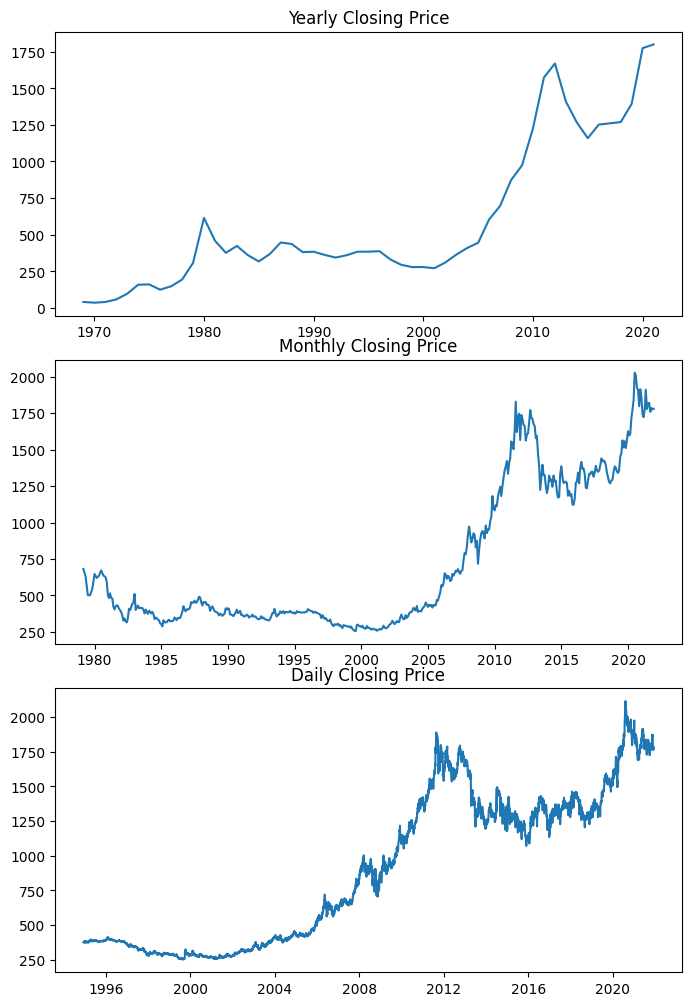

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot average gold yearly closing price
fig, axs = plt.subplots(3,figsize=(7, 10))
fig.tight_layout()


axs[0].plot(yearly_df['Year'],yearly_df['Average'])
axs[0].title.set_text('Yearly Closing Price')
axs[1].plot(monthly_Dates_List,monthly_df['Price'])
axs[1].title.set_text('Monthly Closing Price')
axs[2].plot(daily_Dates_List,daily_df['Price'])
axs[2].title.set_text('Daily Closing Price')

#### Rise of gold price, starting from the 2000s

*The most important visualisation in viewing the historical gold price, as seen above, is a line chart*. We can see the yearly, monthly, and daily closing price of gold closely related, suggesting that the data has integrity and accuracy. We can see a bull run[6] that began from 2000, before ending the run with a 28% fall in 2013[7].

We still have other variables and correlations that can help us visualize this dataset. Let visualize those as well.

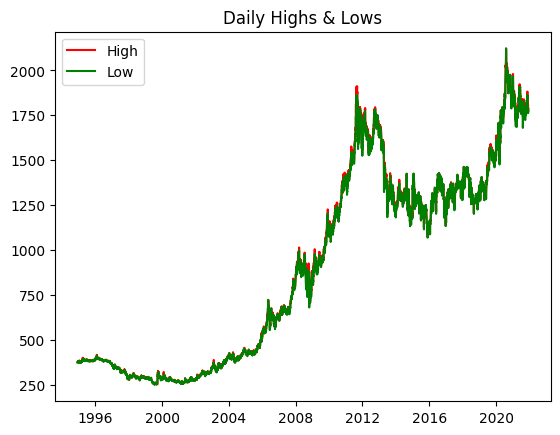

In [20]:
#difference between opening and closing price, monthly
plt.plot(daily_Dates_List, daily_df['High'],color="red",label="High")
plt.plot(daily_Dates_List, daily_df['Low'],color="green",label="Low")
plt.legend()
plt.title("Daily Highs & Lows")
plt.show()

The green line shows the Low price of the gold for the day, whilst the red line in the back, highlights the high of the day. The close correlation between the daily high and lows can imply a tight bid-ask spread[8]. Which means gold was actively traded throughout the decades

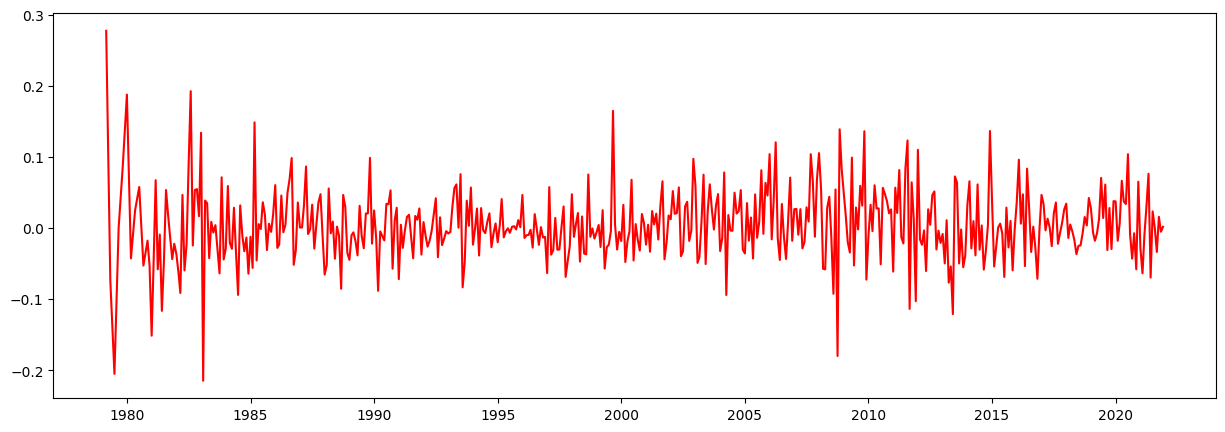

In [21]:
#plot monthly price change
plt.figure(figsize=(15, 5))
plt.plot(monthly_Dates_List, monthly_df['Change'],color="red",label="High")
plt.show()

From this dataset, we can concur that the price change in gold was slightly more volatile between the years of 1980 to 1985. The factors that could have increase the volatility of gold were mentioned the first section of the report, such as political instability and war. This is relevant to use as we can see the price change of gold near 2020 is low, suggesting a relatively stable period in the commodity's timeline. Our linear regression model later on should not deviate too much from the previous price's as it will not be in accordance with the change trend.

## 6 Machine Learning

This section will encompass the building of the linear regression model. We will be using the scikit-learn library for this. The daily gold price data will be used for our multi-linear regression model, as it has more entries, giving our model more data to train itself.

In [22]:
#import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature = daily_df[['Open']]
label = daily_df['Price']

X1, X2, y1, y2 = train_test_split(feature, label, test_size=0.2)

In [30]:
#train our model
first_model = LinearRegression(fit_intercept=True)
first_model.fit(X1,y1)

#predict and print slope and interercept
first_prediction = first_model.predict(X2)
print(first_model.coef_)
print(first_model.intercept_)

[1.00399979]
-0.494590076216582


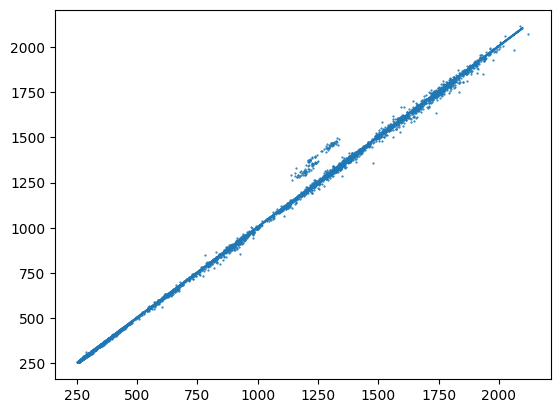

In [44]:
plt.scatter(X1,y1,s=0.3)
plt.plot(X2,first_prediction)
plt.show()

As expected, looking at the comparison chart above that plots the training data of the opening price of the day against the closing price of gold for the day, the scatter points are very closely spaced together. This makes sense because the degree of change between gold's opening and closing price is very tight. The assets price is not volatile. Our model's prediction line closely fits the data, the plot above as as well the intercept printed above supports this. 

However, we cannot just use a single independent variable to predict the dependent variable because we will be missing our on too much additional information. The predicting the future price of gold solely on its previous opening price, whilst ignoring other important information of the trading such as its high and low price, and the training volume, returns an incomplete evaluation of the gold's data.

We shall train a new model with more features.

In [46]:
#split the dataset into training and testing
X = daily_df[['Day', 'Month', 'Year','Open', 'High', 'Low', 'Vol', 'Change']]
y = daily_df['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [47]:
X.shape

(6886, 8)

**The reason why [ 'Month', 'Day', 'Year','Open', 'High', 'Low', 'Vol', 'Change'], were chosen as the features are as follows:**

If there are seasonal patterns in gold prices, incorporating the 'Day','Month;  information might help capture those
trends. For example, there might be historical trends indicating that gold prices tend to rise during certain
months due to increased demand during festive seasons or economic events
    
'Open', 'High', and 'Low' represent various price levels throughout the day. These features allows the model to consider the opening, highest, and lowest prices, which could be indicative of price trends.

Trading volume can provide insights into market activity and liquidity. High trading volumes might be associated with certain price movements. Including volume as a feature allows the model to capture the relationship between trading activity and price changes.

The change in percentage of the daily gold price can offer information about the direction of gold's price movements. It could help the model understand the gold 's momentum in the market.

And our label will be the price of gold for the day.

In [48]:
#create our linear regression model and fit the data
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

<AxesSubplot:xlabel='Price'>

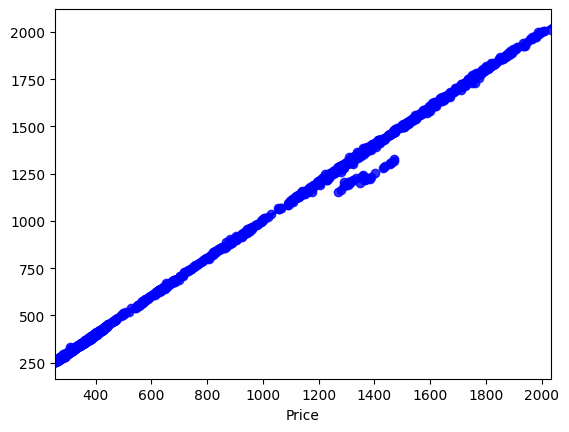

In [49]:
#prediction time
y_results = model.predict(X_test)

#plot the fitted line
sns.regplot(x=y_test, y=y_results, ci=None, color="b")

The above seaborn plot shows a 2D plot of our multi features regression model. We can see the line of the predicted values, follow extremely closely to the test values of our train test split, almost to the point where they are both overlapping. Let us use the R2 score as well to check the fit of our model.

In [50]:
from sklearn.metrics import r2_score

print("Validation R2 score is:",r2_score(y_test,y_results))

Validation R2 score is: 0.9988822550824253


Our R2 score of 99% seems to match our plotted fit of the model. If we look at the independant variables used such as the 'Open', 'High' and 'Low', it makes sense that the variables have a high predictive value of what the outcome dependant would be, in this case, the price of gold for that particular day.

The variance of the y_test and y_results is very low, indicating the prediction results is near identical.

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

print('mean absolute error(MAE):', mean_absolute_error(y_test, y_results)) 
print('mean squared error(MSE):', mean_squared_error(y_test, y_results)) 

mean absolute error(MAE): 6.541334147377849
mean squared error(MSE): 323.43372634971706


The mean absolute error(MAE) is defined as the sum of absolute/positive errors of all values. We can see the absolute error our of test data and the predicted values being off about 7, whilst the mean squared error is the sum of squared differences, the lower the better. 

## 7 Validation

Lets validate our model to see its performance and score using cross validation.

In [52]:
#import cross validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(model, X, y , cv = 5)
cross_score

array([0.9847968 , 0.99453307, 0.99933722, 0.95103146, 0.99657334])

In [53]:
#python string formating
print("Cross validation total mean: %.3f" % cross_score.mean())
print("Cross validation total deviation: %.2f"%(cross_score.std()*2))

Cross validation total mean: 0.985
Cross validation total deviation: 0.04


The array return by cross_val_score is the score of the estimator for each one of the five sets of the cross validation[9]. We can see the score of each of the five sets, is very close to 1, which is the maximum score attainable. This score closely matches the initial `model.score` we did earlier, implying our model is returning a high mean accuracy.

We can see the total mean of the cross validations score is 0.985, with a deviation of +/- 0.04, meaning the range of each fold closer or further away from the mean. Our model continue to very accurately predict unseen data based off the seen, training data.

To further add to the validation of a multiple linear regression model, i will be importing another model to do a comparison, to see if we achieve similar scores, or will another regression model gives us completely different readings.

The model I have chosen is the Random Forest Regression Model. The reason is because this model uses averaging to improve the predictive accuracy and control over-fitting[10].

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_Model = RandomForestRegressor(max_depth=5)

#use cross validation on randomforest
forest_score = cross_val_score(forest_Model,X,y,cv=5)

forest_Model.fit(X_train,y_train)

forest_prediction = forest_Model.predict(X_test)

In [55]:
#python string formating
print("Forest Cross validation total mean: %.3f" % forest_score.mean())
print("Forest Cross validation total deviation: %.2f"%(forest_score.std()*2))

Forest Cross validation total mean: 0.863
Forest Cross validation total deviation: 0.30


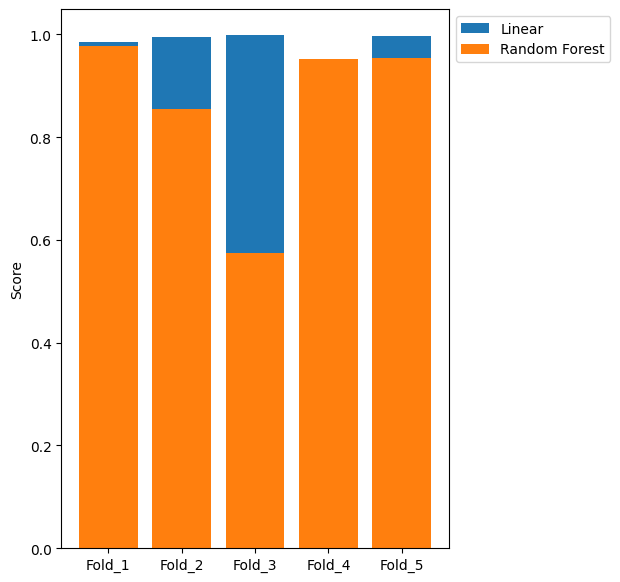

In [56]:
#visualize distributions
sets = ["Fold_1","Fold_2","Fold_3","Fold_4","Fold_5"]
plt.figure(figsize=(5, 7)) 

plt.bar(sets,cross_score.tolist(),label='Linear')
plt.bar(sets,forest_score.tolist(),label='Random Forest')

plt.ylabel("Score") 
plt.legend(bbox_to_anchor=(1.0, 1.0)) 
plt.show()

Firstly, the forest cross validation score mean was 0.860 with a deviation of 0.29. Our linear model gave a better validation of  o.995 and 0.04 respectively. The score difference can also be visualized in the above bar chart, where we can seee the linear score in blue, outperforming significantly in the third fold. Thus we can conclude the validation of our linear regression model.

## 8 Feature Engineering

Our models has already benefited from one of the feature engineering techniques described in the course, imputation of missing values.

We have already done this in section 3, Data Preparation, where we used interpolate() to fill the missing values of our dataset. But in the implementation of the pipeline, we can call the SimpleImputer() to populate the missing values using the most frequent values or other strategies like mean or median.

To ensure all our steps in building our regression model behaves appropriately and in order, we can implement a pipeline. As part of our data-processing pipeline, we will be standardizing and scaling our data first, before feeding it into our model.

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#implement a data pipeline
from sklearn.pipeline import make_pipeline

#standardize and scale features
linear_pipeline = make_pipeline(SimpleImputer(),StandardScaler(),LinearRegression())

linear_pipeline.fit(X,y)

y_predict = linear_pipeline.predict(X_test)

The above cell shows the building of our linear model pipeline. When `linear_pipeline.fit(X,y)` is called, the features are passed into the SimpleImputer, to impute any missing values in the set. In is then passed into the StandardScaler(), which standardizes the data set. This is important as our data set has features of different scale. For exampele, the volume might range from "0-100000" while the daily price change in percentange might range from "0.0% - 3.0%. The difference requires the feature to be standardize to aid in a better performing ML model.

## 10 Evaluation

To close of this final section of the report, we shall evaluate the linear regression model built through the data pipeline against the validation random forest model.

To evaluate, we will be **measuring the R^Square(R2) AND Root Mean Square Error(RMSE) of the model**, which is the root of the mean square error. The mean square error, as seen above prior to building the pipiline, measures the difference between the predicted versus the actual values, squares it, then returns the mean of all the samples in that set. 

We are using RMSE in conjuction with R2 because RMSE tells the distance of the predicted versus the actual, while R2 represents the proportion of variance (of y) that has been explained by the independent variables[11]. The lower RMSE score the better, the high the R2 score, the better.

Both these make sense for evaluating the predicition of gold as we want to know how far off the the predict gold price is from the actual and how well does the predicted gold price stack against the actual price.

In [58]:
#numerical evaluation
modelNames = ['Linear PipeLine','RandomForest']
col_names = ['RMSE','R2']
score_cards = [[mean_squared_error(y_test,y_predict,squared=False),r2_score(y_test,y_predict)],
               [mean_squared_error(y_test,forest_prediction,squared=False),r2_score(y_test,forest_prediction)]]

eval_Table = pd.DataFrame(data=score_cards,index=modelNames,columns=col_names)
eval_Table

,RMSE,R2
Linear PipeLine,17.941898,0.998888
RandomForest,19.514658,0.998684


The above pandas dataframe shows the results. The linear model performed better in both measurement metrics.

The contributions to the selected domain-specific area, in this case, financial markets, can help retail and even institutional investors decide how to manage the commodity gold, should it be in their portfolio. By using the linear regression model, they can get a prediction as to what the gold price will be in the near future, aiding in their decision to buy or sell, alongside other market indicators.

The solution here is transferable to other domain-specific area in finance such as predicting stock price or the price of other commodities. For example, users can use the linear regression model to predict forex price's of their choice, aiding in investing/trading.

## References

[1] World Gold Council. (n.d.). Money and Gold. [online] Available at: https://www.gold.org/history-gold/gold-as-currency

[2] ETF Database. (n.d.). Gold ETF List. [online] Available at: https://etfdb.com/etfs/commodity/gold/

[3] Maxwell, T. (2022). Why You Should Buy Gold during Inflation. [online] www.cbsnews.com. Available at: https://www.cbsnews.com/news/why-you-should-buy-gold-during-inflation/ 

[4] Dataset : https://www.kaggle.com/datasets/nward7/gold-historical-datasets?select=Gold_Monthly.csv

[5] Investing.com (2023). Investing.com - Stock Market Quotes & Financial News. [online] Investing.com. Available at: https://www.investing.com/.

[6] Chen, J. (2019). Bull Market Definition. [online] Investopedia. Available at: https://www.investopedia.com/terms/b/bullmarket.asp.

[7] Shumsky, T. (2013). Gold Falls 28% In 2013, Ends 12-Year Bull Run. Wall Street Journal. [online] 31 Dec. Available at: https://www.wsj.com/articles/SB10001424052702304591604579292321014055380

[8] Investopedia. (n.d.). What Is a Bid-Ask Spread, and How Does It Work in Trading? [online] Available at: https://www.investopedia.com/terms/b/bid-askspread.asp#:~:text=In%20financial%20markets%2C%20a%20bid.

[9] Scikit-learn.org. (2019). sklearn.model_selection.cross_val_score — scikit-learn 0.22 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html.

[10] scikit-learn (2018). 3.2.4.3.2. sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html.

[11]scikit-learn. (n.d.). 3.3. Metrics and scoring: quantifying the quality of predictions. [online] Available at: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score